# New Section
Preparing the data needed


In [ ]:
%reload_ext google.colab.data_table
!pip install tweet-preprocessor

!pip install contractions

!pip install ipython-autotime

%load_ext autotime

from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
tf.test.gpu_device_name()

     |████████████████████████████████| 284 kB 8.0 MB/s 
     |████████████████████████████████| 106 kB 74.3 MB/s 
Mounted at /content/drive


'/device:GPU:0'

time: 47.5 s (started: 2022-03-02 20:40:17 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os.path


data = pd.read_csv('/content/drive/MyDrive/final2.csv',encoding="iso-8859-1", header=None, usecols=[0,1], delimiter=",")
data.columns = ["tweet_processed","target"]

data = data.iloc[1:,:]
data

,tweet_processed,target
1,i want to flashback and skip 2016,0
2,it will get better soon..... HOPEFULLY pic...,0
3,just cried floods of tears whilst watching ...,0
4,another great talent lost to us. songs stay ...,0
5,"Group is open every Wednesday, 3pm - 5pm at ...",0
...,...,...
6269,YAY for bonfires!!!!,0
6270,Yay for free food! Even more yay for the fact ...,0
6271,Yay for oodles of rain.,0
6272,Yay going to see All American Rejects in Augus...,0


time: 553 ms (started: 2022-03-02 20:41:04 +00:00)


In [ ]:

def drop(data):


  data = data.drop_duplicates(subset =["tweet_processed"])


  mask3 = data.target == '1'
  mask4b = data.tweet_processed.apply(lambda x: x.count(" ") > 5)

  data = data[mask4b | mask3]

  return data

data = drop(data)


time: 21.7 ms (started: 2022-03-02 20:41:05 +00:00)


In [ ]:
print(len(data))

5966
time: 1.46 ms (started: 2022-03-02 20:41:05 +00:00)


In [ ]:
import numpy as np
import re
import preprocessor as p
import contractions

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

pd.set_option('mode.chained_assignment', None)



sw_nltk = stopwords.words('english')


def prepro(data):


  # pre process tweets in vectorizing technique
  vect_pre_process = np.vectorize(pre_processing)
  data['tweet_processed'] =  vect_pre_process(data['tweet_processed'])
  return data


def pre_processing(tweet):
    p.set_options(p.OPT.URL)
    tweet = p.clean(tweet) #Remove http links

    #expandContractions
    tweet = contractions.fix(tweet)



    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)       #replace consecutive non-ASCII characters with a space
    tweet = re.sub("&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-fA-F]{1,6});", "",tweet) #remove html garbage
    tweet = re.sub("@([a-zA-Z0-9_]{1,15})","",tweet)
    tweet = re.sub("([0-9])","",tweet)
    tweet = re.sub("#","", tweet)
    tweet=re.sub(r'(.)\1+', r'\1\1', tweet)

    #remove punctuation characters
    filters='"$%&\'()*+-/,.:;<=>[]^`{|}~_' # just removed ?!
    translate_dict = dict((c, " ") for c in filters)
    translate_map = str.maketrans(translate_dict)
    tweet = tweet.translate(translate_map)

    # convert text to lowercase and remove repetations
    tweet = tweet.strip().lower()
    tweet = re.sub(r'\\n',' ',tweet)
    tweet = re.sub(r'\\t',' ',tweet)
    tweet = re.sub(r'\\r',' ',tweet)
    tweet = re.sub(' +',' ',tweet)
    tweet = re.sub('\?+','?',tweet)
    tweet = re.sub('\!+','!',tweet)


    #remove stopwords

    # words = [word for word in tweet.split() if word not in sw_nltk]
    # tweet = " ".join(words)
    return tweet



mask4b = data.target == '1'



data = prepro(data)


def drop(data):

  data = data.drop_duplicates(subset =["tweet_processed"])
  data = data.dropna(subset = ["tweet_processed"] )
  return data

data = drop(data)
print(len(data))
data.to_csv('/content/drive/MyDrive/final2clean.csv', index=False)
data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
5957


,tweet_processed,target
1,i want to flashback and skip,0
2,it will get better soon hopefully,0
3,just cried floods of tears whilst watching gog...,0
4,another great talent lost to us songs stay wit...,0
5,group is open every wednesday pm pm at the zio...,0
...,...,...
6265,yarn arrived for vivian! colour not as expecte...,0
6266,yasmina s chocolates were awful but she is a b...,0
6270,yay for free food! even more yay for the fact ...,0
6272,yay going to see all american rejects in augus...,0


time: 1.84 s (started: 2022-03-02 20:41:05 +00:00)


#new_section
tokenize and pad for embedd layer in model


In [ ]:
  from tensorflow.keras.preprocessing.text import Tokenizer
  from tensorflow.keras.preprocessing.sequence import pad_sequences

  lengths = data["tweet_processed"].str.split()

  max = lengths.str.len().max()
  print (max)
  targets = data['target']

  tweets = data['tweet_processed']
  tokenizer = Tokenizer()
  # tokenizing based on "texts".
  # This step generates the word_index and map each word to an integer other than 0.
  tokenizer.fit_on_texts(tweets)

  # generating sequence based on tokenizer's word_index.
  # Each sentence will now be represented by combination of numericals
  seq = tokenizer.texts_to_sequences(tweets)

  tags = np.asarray(targets)
  tags = tags.astype(int)
  word_index = tokenizer.word_index
  # padding each numerical representation of sentence to have fixed length.

  pad_x = pad_sequences(seq,max)
  total_words = len(word_index) + 1


  print(total_words)

  print("Data converted to Sequences...")

62
10315
Data converted to Sequences...
time: 231 ms (started: 2022-03-02 20:54:43 +00:00)


#new_section
get embeding from google

In [ ]:
import gensim.downloader as api
#print(api.info())
keyedVec = api.load("glove-twitter-200")

[==================================================] 100.0% 758.5/758.5MB downloaded
time: 6min 5s (started: 2022-03-02 20:46:45 +00:00)


In [ ]:
# Converting data to matrix of shape (1328,300) where #12 1328 is number of words in vocaboulry + 1 and 300 word vector for each word
#
e_words = total_words

sk = 0
embedding_vector = []
embedding_dim = 200
embedding_matrix = np.zeros((e_words, embedding_dim))

for word, index  in word_index.items():
  try:
    embedding_vector = []
    embedding_vector = keyedVec[word]
  except:

    #print(word)
    sk +=1
    continue

  embedding_matrix[index] = embedding_vector
print(sk)

print("Embeddings Matrix shape : ",embedding_matrix.shape)

777
Embeddings Matrix shape :  (10315, 200)
time: 41.6 ms (started: 2022-03-02 20:52:50 +00:00)


#new_section
contuine

In [ ]:
def secToembed(textsec):
  vec = []
  for tok in textsec:
      if tok == 0:

        vec.append(np.random.rand(200))
      else:

        vec.append(embedding_matrix[tok])

  return np.asarray(vec).flatten()


x_vecs = np.asarray([secToembed(seq) for seq in pad_x])


print(*x_vecs[2])

0.9954693884256358 0.38606261031783295 0.2002997344221108 0.6746777214119328 0.8170341889066137 0.8075161698644557 0.664023336515853 0.004969791599032103 0.35319543162115474 0.4298857291894491 0.06879507829566434 0.0405919005454467 0.261246757284638 0.005180706691188086 0.14431588225891356 0.5356198307972675 0.4817695853026128 0.6868158588234007 0.13983270464602893 0.9220431096282583 0.9836767383031901 0.18583154181646 0.30708648190539956 0.330041718675109 0.005590179481617108 0.2852628040115872 0.8765787402921533 0.6367615593516311 0.8193108648837674 0.06632534202056217 0.7161776287184395 0.42505841256073185 0.7966818532830415 0.612387973423652 0.18460696769360174 0.7280703286269495 0.7234427729149429 0.49603263236576345 0.5412300464191963 0.34904421840258304 0.8751500935496936 0.11887047308709142 0.48750937848800047 0.45462663118877367 0.2874255031360359 0.6398662024458042 0.20036304965117346 0.13322926341311947 0.8457934124865132 0.02268973476960323 0.2532853039588886 0.104539910259

In [ ]:
#data to input for embed layer
x, xtest, y, ytest = train_test_split(pad_x, tags, test_size=0.2, random_state=2,shuffle=True)

print(x.shape)

#num of depressed in train

mask4b = 0
for item in y:
  if item == 1:
    mask4b += 1

print(mask4b)

mask4b = 0
for item in ytest:
  if item == 1:
    mask4b += 1

print(mask4b)

(4765, 62)
1802
449
time: 17.8 ms (started: 2022-03-02 20:54:53 +00:00)


# New Section
CNN




In [ ]:
#define model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import keras.layers as kslay

time: 2.86 ms (started: 2022-03-02 20:54:55 +00:00)


In [ ]:
#42 2
Em = kslay.Embedding(total_words,200 ,weights = [embedding_matrix], input_length = max, trainable = False)
model = Sequential()


model.add(Em)
model.add(kslay.Conv1D(filters=200, kernel_size=3, activation='relu'))
model.add(kslay.MaxPooling1D(pool_size=30))
model.add(kslay.Flatten())
model.add(kslay.Dense(150, activation='relu'))
model.add(kslay.Dense(1, activation='sigmoid'))
  # compile network
opt = tf.keras.optimizers.Adamax()
model.compile(loss='MSE',optimizer= opt , metrics=['accuracy'])


print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 62, 200)           2063000   
                                                                 
 conv1d (Conv1D)             (None, 60, 200)           120200    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 200)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 150)               60150     
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                        

In [ ]:

# fit network
history = model.fit(x, y, epochs=5,validation_data=(xtest, ytest),
                    verbose=2)



Epoch 1/5
149/149 - 11s - loss: 0.1201 - accuracy: 0.8319 - val_loss: 0.0870 - val_accuracy: 0.8809 - 11s/epoch - 72ms/step
Epoch 2/5
149/149 - 1s - loss: 0.0782 - accuracy: 0.8965 - val_loss: 0.0805 - val_accuracy: 0.8884 - 525ms/epoch - 4ms/step
Epoch 3/5
149/149 - 0s - loss: 0.0598 - accuracy: 0.9261 - val_loss: 0.0941 - val_accuracy: 0.8658 - 456ms/epoch - 3ms/step
Epoch 4/5
149/149 - 1s - loss: 0.0430 - accuracy: 0.9530 - val_loss: 0.0750 - val_accuracy: 0.9027 - 532ms/epoch - 4ms/step
Epoch 5/5
149/149 - 1s - loss: 0.0278 - accuracy: 0.9754 - val_loss: 0.0768 - val_accuracy: 0.8909 - 539ms/epoch - 4ms/step
time: 13 s (started: 2022-03-02 20:54:55 +00:00)


In [ ]:
model.save("/content/drive/MyDrive/Fcnn.h5")

time: 658 ms (started: 2022-03-02 20:55:08 +00:00)


[[0.00647064]
 [0.69681853]
 [0.02448611]
 ...
 [0.71011996]
 [0.03238227]
 [0.99983394]]
[0. 1. 0. ... 1. 0. 1.]
              precision    recall  f1-score   support

           0    0.91252   0.91252   0.91252       743
           1    0.85523   0.85523   0.85523       449

    accuracy                        0.89094      1192
   macro avg    0.88388   0.88388   0.88388      1192
weighted avg    0.89094   0.89094   0.89094      1192

[[678  65]
 [ 65 384]]


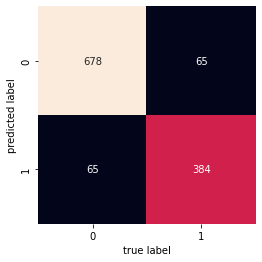

time: 477 ms (started: 2022-03-02 20:55:52 +00:00)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


preds = model.predict(xtest)
preds  = np.round(preds.flatten())
print(preds)
cr = classification_report(ytest, preds, digits=5)
print(classification_report(ytest, preds, digits=5))
cm = confusion_matrix(ytest, preds)
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

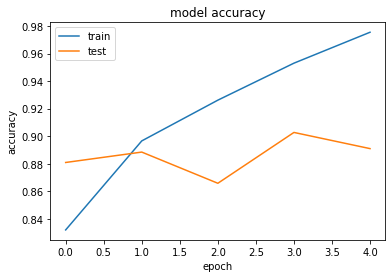

time: 152 ms (started: 2022-03-02 20:55:09 +00:00)


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

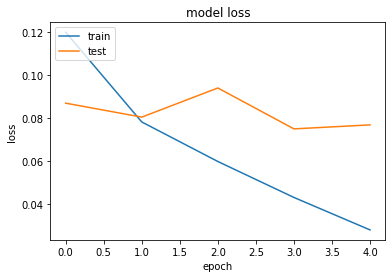

time: 151 ms (started: 2022-03-02 20:55:09 +00:00)


In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[0.00771837]
 [0.06584083]
 [0.9506275 ]
 ...
 [0.7597866 ]
 [0.00214504]
 [0.999863  ]]
              precision    recall  f1-score   support

           0    0.98956   0.99190   0.99073      2963
           1    0.98663   0.98280   0.98471      1802

    accuracy                        0.98846      4765
   macro avg    0.98810   0.98735   0.98772      4765
weighted avg    0.98845   0.98846   0.98845      4765



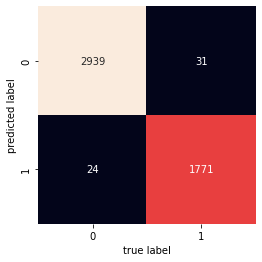

time: 454 ms (started: 2022-03-02 20:55:10 +00:00)


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x)
print(y_pred)
y_pred  = np.round(y_pred.flatten())
print(classification_report(y, y_pred, digits=5))
cm = confusion_matrix(y, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

# New Section
SVM poly linear words embedding



83


using PCA for dimansion reduction

In [ ]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=500)
pca_model.fit(x_vecs)
print("Sum of variance ratios: ",sum(pca_model.explained_variance_ratio_))

Sum of variance ratios:  0.4691164915196045
time: 1min 3s (started: 2022-01-01 21:56:00 +00:00)


In [ ]:
x_comps = pca_model.transform(x_vecs)
x_vecs.shape

(5957, 12400)

time: 2.45 s (started: 2022-01-01 21:57:03 +00:00)


In [ ]:
xembed, x_test, yembed, y_test = train_test_split(x_comps, tags, test_size=0.1, random_state=2,shuffle=True)
print(xembed.shape)

(5361, 500)
time: 23.2 ms (started: 2022-01-01 21:57:06 +00:00)


In [ ]:
from sklearn.svm import SVC

# initialize the model and assign weights to each class
clf = SVC(kernel ='poly',C=3)


time: 1.82 ms (started: 2022-01-01 21:57:06 +00:00)


In [ ]:
# train the model
clf.fit(xembed, yembed)


SVC(C=3, kernel='poly')

time: 6.04 s (started: 2022-01-01 21:57:24 +00:00)


              precision    recall  f1-score   support

           0       0.80      0.95      0.87       374
           1       0.87      0.60      0.71       222

    accuracy                           0.82       596
   macro avg       0.84      0.78      0.79       596
weighted avg       0.83      0.82      0.81       596

[[354  20]
 [ 88 134]]


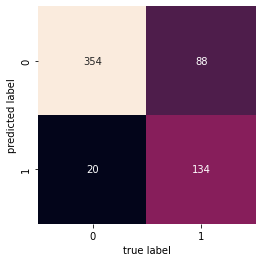

time: 587 ms (started: 2022-01-01 21:57:30 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3332
           1       1.00      1.00      1.00      2029

    accuracy                           1.00      5361
   macro avg       1.00      1.00      1.00      5361
weighted avg       1.00      1.00      1.00      5361



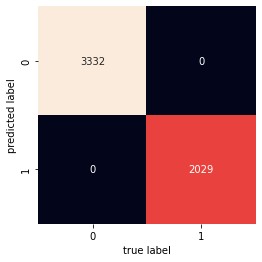

time: 4min 1s (started: 2022-01-01 21:50:15 +00:00)


In [ ]:
y_pred = clf.predict(xembed)
from sklearn.metrics import classification_report
print(classification_report(yembed, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yembed, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
          )
plt.xlabel('true label')
plt.ylabel('predicted label');

#new_section
svm pipeline tfidf

88


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

time: 3.6 ms (started: 2022-03-02 20:41:39 +00:00)


              precision    recall  f1-score   support

           0    0.88071   0.93405   0.90660       743
           1    0.87871   0.79065   0.83236       449

    accuracy                        0.88003      1192
   macro avg    0.87971   0.86235   0.86948      1192
weighted avg    0.87996   0.88003   0.87863      1192



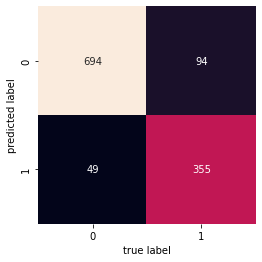

time: 865 ms (started: 2022-03-02 20:41:41 +00:00)


In [ ]:
#Linear Support Vector

x,xt,y,yt =train_test_split(tweets, tags, test_size=0.2, random_state = 2)

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l1')),
               ])
sgd.fit(x, y)

y_pred = sgd.predict(xt)
print(classification_report(yt, y_pred, digits=5))
cm = confusion_matrix(yt, y_pred)

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
           )
plt.xlabel('true label')
plt.ylabel('predicted label');


[0 0 1 ... 1 0 1]
              precision    recall  f1-score   support

           0    0.92467   0.97773   0.95046      2963
           1    0.95956   0.86903   0.91206      1802

    accuracy                        0.93662      4765
   macro avg    0.94212   0.92338   0.93126      4765
weighted avg    0.93787   0.93662   0.93594      4765



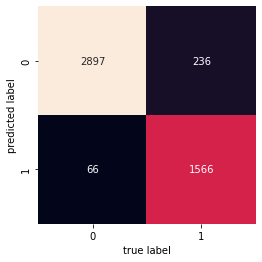

time: 682 ms (started: 2022-03-02 20:42:01 +00:00)


In [ ]:

y_pred = sgd.predict(x)
print(y_pred)
cm = confusion_matrix(y, y_pred)

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
           )
plt.xlabel('true label')
plt.ylabel('predicted label');
print(classification_report(y, y_pred, digits=5))

#new_section
naive_bayes

#84


In [ ]:
from sklearn.naive_bayes import MultinomialNB


nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB(alpha=0.5)),
              ])
nb.fit(x, y)


predictions_NB = nb.predict(xt)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",classification_report(yt, predictions_NB))



Naive Bayes Accuracy Score ->                precision    recall  f1-score   support

           0       0.85      0.90      0.88       743
           1       0.82      0.73      0.78       449

    accuracy                           0.84      1192
   macro avg       0.84      0.82      0.83      1192
weighted avg       0.84      0.84      0.84      1192

time: 309 ms (started: 2022-01-01 21:43:42 +00:00)


#new_section
Logistic regerssion

88



              precision    recall  f1-score   support

           0    0.88622   0.94347   0.91395       743
           1    0.89526   0.79955   0.84471       449

    accuracy                        0.88926      1192
   macro avg    0.89074   0.87151   0.87933      1192
weighted avg    0.88963   0.88926   0.88787      1192



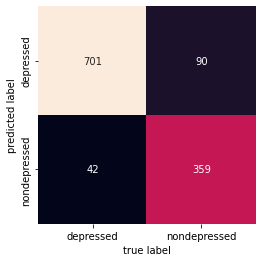

time: 1.32 s (started: 2022-01-01 19:12:30 +00:00)


In [ ]:
#LR
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=-1, C=1e1)),
               ])
logreg.fit(x, y)

y_pred = logreg.predict(xt)

print(classification_report(yt, y_pred, digits=5))

cm = confusion_matrix(yt, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
        )
plt.xlabel('true label')
plt.ylabel('predicted label');


In [ ]:

y_pred = logreg.predict(x)

print(classification_report(y, y_pred, digits=5))

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
        )
plt.xlabel('true label')
plt.ylabel('predicted label');


In [ ]:
# from sklearn import metrics
# from sklearn.model_selection import ShuffleSplit,cross_val_score,cross_val_predict

# score = cross_val_score(model,tweets,tags,cv=10)
# print(score)
# predicted = cross_val_predict(model,tweets,tags, cv=10)

# print(predicted.shape)
# print(metrics.accuracy_score(tags, predicted))
# https://github.com/knathanieltucker/bit-of-data-science-and-scikit-learn/blob/master/notebooks/CrossValidation.ipynb
# https://www.youtube.com/watch?v=L_dQrZZjGDg
